In [1]:
import pandas as pd
from jikanpy import Jikan
import csv as csv
import time as time
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
username = input("Enter your username: ")

Enter your username: paktastic


In [3]:
jikan = Jikan()

In [4]:
jikan.user(username= username)['anime_stats']['completed']

221

In [5]:
completed = jikan.user(username= username)['anime_stats']['completed']

In [6]:
animetitlelist = []
animescorelist = []
animeidlist = []
avgtitlelist = []
avgscorelist = []


In [7]:
for i in range (1+math.ceil(completed /300)):
    a=jikan.user(username= username, request = 'animelist',argument = 'completed', page = i +1)
    time.sleep(2)
    animescorelen = len(a['anime'])
    for j in range(animescorelen):
        animetitlelist.append(a['anime'][j]['title'])
        animescorelist.append(a['anime'][j]['score'])
        animeidlist.append(a['anime'][j]['mal_id'])

In [8]:
d = {'Anime title': animetitlelist, 'anime score': animescorelist, 'mal id': animeidlist}

In [9]:
df = pd.DataFrame(data=d)

In [10]:
animelistlen = len(animetitlelist) #sleep(2) used for testing to see if all records are loaded. Sometimes if sleep is too short it skips a record
for i in range(animelistlen):
    try:
    ##    avgtitlelist.append(jikan.search('anime',animeidlist[i])['results'][0]['title'])
    ##    time.sleep(2)
        avgscorelist.append(jikan.anime(animeidlist[i])['score'])
        time.sleep(2)
        print(str(len(animetitlelist) - i)+' left' )
    except Exception:
    
       
        pass
    

221 left
220 left
219 left
218 left
217 left
216 left
215 left
214 left
213 left
212 left
211 left
210 left
209 left
208 left
207 left
206 left
205 left
204 left
203 left
202 left
201 left
200 left
199 left
198 left
197 left
196 left
195 left
194 left
193 left
192 left
191 left
190 left
189 left
188 left
187 left
186 left
185 left
184 left
183 left
182 left
181 left
180 left
179 left
178 left
177 left
176 left
175 left
174 left
173 left
172 left
171 left
170 left
169 left
168 left
167 left
166 left
165 left
164 left
163 left
162 left
161 left
160 left
159 left
158 left
157 left
156 left
155 left
154 left
153 left
152 left
151 left
150 left
149 left
148 left
147 left
146 left
145 left
144 left
143 left
142 left
141 left
140 left
139 left
138 left
137 left
136 left
135 left
134 left
133 left
132 left
131 left
130 left
129 left
128 left
127 left
126 left
125 left
124 left
123 left
122 left
121 left
120 left
119 left
118 left
117 left
116 left
115 left
114 left
113 left
112 left
111 left
1

In [11]:
df['avg score'] = avgscorelist

In [12]:
pd.set_option('display.max_rows', 1000)

In [13]:
avgdf = df

In [14]:
avgdf['Score_diff'] = avgdf['avg score'] - avgdf['anime score']

In [15]:
cleanavgdf1 = avgdf[avgdf['avg score'] != 'NaN']

In [16]:
avgdf[avgdf['avg score'] != 'NaN']
len(avgdf)

221

In [17]:
cleanavgdf1.replace(["NaN", 'NaT'], np.nan, inplace = True)
missingdf = cleanavgdf1[cleanavgdf1.isnull().any(axis=1)]
cleanavgdf1 = cleanavgdf1.dropna()

In [18]:
finalcleandf = cleanavgdf1.loc[cleanavgdf1['anime score'] > 0]
  

In [19]:
finalcleandf.to_csv(username + 'data', sep='\t')

In [20]:
userdistlist = finalcleandf['anime score'].to_numpy()

In [21]:
test = finalcleandf.sort_values('anime score', ascending = False).reset_index(drop=True)

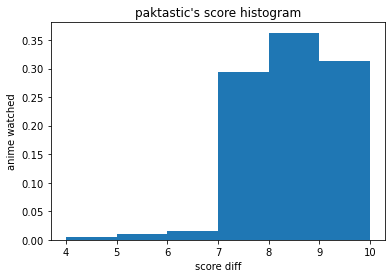

In [39]:
uniquescore = np.unique(userdistlist)
uniquescore = uniquescore.sort()
scoredis = finalcleandf['anime score'].to_numpy()
dist= plt.hist(scoredis, density=True, bins=6)#change bin to uunique scoredistributions
plt.ylabel('anime watched')
plt.xlabel('score diff');
plt.title(username +'\'s score histogram')
plt.show()

In [23]:
finalcleandf.nsmallest(10,'anime score' , keep='first')

,Anime title,anime score,mal id,avg score,Score_diff
202,Sword Art Online,4,11757,7.22,3.22
3,Accel World,5,11759,7.29,2.29
46,Dragon Ball GT,5,225,6.46,1.46
66,Elfen Lied,6,226,7.54,1.54
106,High School DxD New,6,15451,7.51,1.51
110,I My Me! Strawberry Eggs,6,509,6.79,0.79
6,Ansatsu Kyoushitsu,7,24833,8.11,1.11
12,Beelzebub,7,9513,7.89,0.89
16,Black Lagoon: The Second Barrage,7,1519,8.18,1.18
17,Blend S,7,34618,7.33,0.33


In [24]:
finalcleandf.nlargest(10,'Score_diff' , keep='first')

,Anime title,anime score,mal id,avg score,Score_diff
202,Sword Art Online,4,11757,7.22,3.22
3,Accel World,5,11759,7.29,2.29
35,Cowboy Bebop,7,1,8.77,1.77
66,Elfen Lied,6,226,7.54,1.54
106,High School DxD New,6,15451,7.51,1.51
184,Samurai Champloo,7,205,8.50,1.50
46,Dragon Ball GT,5,225,6.46,1.46
140,Kuroko no Basket 3rd Season,7,24415,8.32,1.32
166,No Game No Life: Zero,7,33674,8.27,1.27
139,Kuroko no Basket 2nd Season,7,16894,8.26,1.26


In [25]:
residuals = finalcleandf['Score_diff'].to_numpy()

Text(0.5, 1.0, "paktastic's difference histogram")

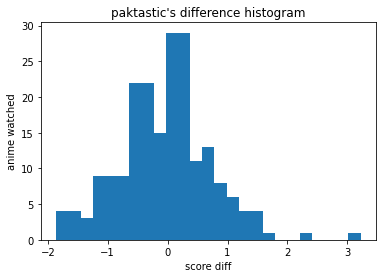

In [26]:
plt.hist(residuals, density=False, bins=25) 
plt.ylabel('anime watched')
plt.xlabel('score diff');
plt.title(username +'\'s difference histogram')

In [27]:
sum(residuals)/len(residuals)

-0.038725490196078495

In [28]:
np.std(residuals)

0.7612685125327195